### Cat and Dog Image Classification using SVM

In [1]:
!pip install opencv-python

In [2]:
##Importing the necessary libraries
import os
import joblib
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog

In [3]:
##Load the dataset
train_data = r"train"
test_data = r"C:\\Users\\Ayush\\Desktop\\Prodigy Tasks\\Task-3\\test1\\test1"

In [4]:
def preprocessing(data_path,is_train=True):
    data=[]
    labels=[]
    
    for file in os.listdir(data_path):
        if is_train:
            label=file.split(".")[0]
            #this line is extracting the label from the name of the file/image in this case 
        else:
            label=None
            #for test data labels are not available
            
        img_path = os.path.join(data_path,file)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(64,64)) #size can be changed as per need
        #,here 64 ,64 has been selected for now as this size is generally uses less time 
        
        
        #converting the image to greyscale to use the HOG feature 
        grey_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
        #computing HOG features 
        
        features,_=hog(grey_img,orientations=8,pixels_per_cell=(8,8),cells_per_block=(1,1),block_norm="L2-Hys",visualize=True)
        data.append(features)
        labels.append(label)
        
    return np.array(data),np.array(labels)

In [5]:
##Train set
X_train,y_train =preprocessing(train_data)

In [6]:
#Applying label encoder
label_encoder = LabelEncoder()
y_train_new = label_encoder.fit_transform(y_train) 

In [7]:
##Applying train test split
X_train_split , X_val_split ,y_train_split,y_val_split = train_test_split(X_train,y_train_new , test_size =0.2,random_state=42)

In [8]:
#training the SVM model
svm_classifier=SVC(kernel="linear")
svm_classifier.fit(X_train_split,y_train_split)

SVC(kernel='linear')

In [9]:
#evaluation on the validation set
y_val_pred = svm_classifier.predict(X_val_split)
accuracy = accuracy_score(y_val_split,y_val_pred)
print("Validation Accuracy:",accuracy*100)
#accuracy obtained is very low , can be boosted by changing the approach from SVM to CNN 

Validation Accuracy: 68.34


In [10]:
#saving the trained model for future use 
joblib.dump(svm_classifier,"svm_model.pkl")

['svm_model.pkl']

In [11]:
#loading the process test data
X_test,_ =preprocessing(test_data,is_train=False)
#makeing prediction 
y_test_pred = svm_classifier.predict(X_test)

#converting numerical values back to labels 
y_test_pred_original = label_encoder.inverse_transform(y_test_pred)

In [17]:
import joblib

# Load SVM model using joblib
svm_model = joblib.load('svm_model.pkl')

Enter the path to the image you want to classify: test1\test1\5.jpg


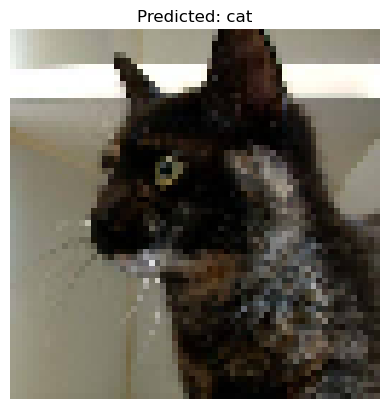

Predicted label: cat


In [19]:
import matplotlib.pyplot as plt
def predict_image(img_path, model, label_encoder):
    img = cv2.imread(img_path)
    if img is None:
        print("Error loading image:", img_path)
        return None#dealing with errors if any after checking the path if file exsits or not 
    
    img = cv2.resize(img, (64, 64))
    grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features, _ = hog(grey_img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), block_norm="L2-Hys", visualize=True)
    features = np.array([features])
    prediction = model.predict(features)
    predicted_label = label_encoder.inverse_transform(prediction)[0]
    
    # Displaying the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Predicted: {predicted_label}")
    plt.show()
    
    return predicted_label

# Geting user input for image path
user_img_path = input("Enter the path to the image you want to classify: ")

# Predicting the class of the user input image
predicted_label = predict_image(user_img_path, svm_model, label_encoder)
if predicted_label is not None:
    print("Predicted label:", predicted_label)